In [1]:
# import modules
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
import geopandas as gpd
import numpy as np
from collections import Counter

df = pd.read_csv('../../../datasets/final_parsed_malt_data_cleaned.csv')
df

,name,profile_image,headline,experience,price,response_rate,response_time,categories,skills,supermalter,...,presentation,recommendations,missions,teletravail_preference,profil,link,creation_date,city,Region_Name,timestamp
0,vince huguet,No profile image,Webdesigner,-,499,1.00,1h,['Webdesigner'],['Design'],0,...,Je vous dis bonjour.,0,0,0,vincehuguet,https://www.malt.fr/profile/vincehuguet,2013-02-26,Paris,île-de-france,2013-02-26
1,Stanislas Blaineau,https://dam.malt.com/fgvxeyh2zekvtqqrfbis?grav...,développeur php symphony 2/3/4 - full stack,8-15,400,0.91,4h,"['Développeur Web Back-end', 'Développeur Web ...","['symfony 2/3/4', 'MySQL', 'jQuery', 'Bootstra...",0,...,"Développeur web full-stack PHP depuis 2012, j'...",2,0,0,stanislasblaineau,https://www.malt.fr/profile/stanislasblaineau,2013-09-23,Lyon,auvergne-rhône-alpes,2013-09-23
2,Laura Ferron,https://dam.malt.com/rhqcv7lqrx2p8ujw2bok?grav...,Product designer Senior - UX / UI - Figma,8-15,400,1.00,1h,"['UI Designer', 'UX Designer']","[""design d'interface mobile"", 'Webdesign', 'Us...",1,...,Besoin d'une aide graphique pour un nouveau pr...,18,0,0,lauraferron,https://www.malt.fr/profile/lauraferron,2014-01-18,Paris,île-de-france,2014-01-18
3,Loïc B.,No profile image,DA Web / Chef de projets,-,300,1.00,1h,['Product Manager'],"['E-commerce', 'Wordpress', 'Prestashop', 'Ado...",0,...,Après plusieurs années en agence ( création de...,0,0,0,loicbel,https://www.malt.fr/profile/loicbel,2013-05-22,Toulouse,occitanie,2013-05-22
4,Philippe De Cuzey,https://dam.malt.com/vbjgjtuddc6dxgbk28qj?grav...,data engineer senior,8-15,750,0.50,2h,['Data Engineer'],"['Python', 'Spark', 'SQL', 'noSQL', 'Apache Ka...",0,...,"free lance data engineer, working on Big Data ...",1,0,0,philippedecuzey,https://www.malt.fr/profile/philippedecuzey,2014-01-16,Paris,île-de-france,2014-01-16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178925,Caroline Aubry,https://dam.malt.com/8164ce22-8e98-4d6c-ab00-6...,Designer graphique - Websigner - Graphiste print,15et+,350,1.00,1h,"['Graphiste', 'UX Designer', 'Webdesigner']","['Adobe Photoshop', 'Adobe Illustrator', 'Desi...",0,...,"Designer graphique depuis plus de 15 ans, j'ex...",0,0,0,carolineaubry1,https://www.malt.fr/profile/carolineaubry1,2023-10-23,Lorient,bretagne,2023-10-23
178926,Catarina Marques,https://dam.malt.com/988d7dea-cf3c-4da0-b692-3...,Community manager,0-2,400,1.00,1h,['Community Manager'],"['Community management', 'Réseaux sociaux', 'C...",0,...,NaN,0,0,0,catarinamarques,https://www.malt.fr/profile/catarinamarques,2023-10-25,Houdan,île-de-france,2023-10-25
178927,Samy S.,https://dam.malt.com/24f73853-3e80-4972-a952-f...,Développeur Web,0-2,150,1.00,24h,"['Développeur CMS', 'Développeur Web Back-end'...","['HTML5', 'CSS3', 'Bubble.io', 'JavaScript', '...",0,...,"Développeur web full stack de formation, je ma...",0,0,0,samysebahi,https://www.malt.fr/profile/samysebahi,2023-10-15,Paris,île-de-france,2023-10-15
178928,Ophélie D.,https://dam.malt.com/520ca9da-4784-44c5-9833-7...,Conseil Marketplaces | Mirakl Amazon Cdiscount,3-7,300,1.00,4h,['Chef de projet digital'],"['E-commerce', 'Commerce de détail', 'Marketpl...",0,...,Le saviez-vous ?70% des ventes en ligne se fon...,0,0,0,opheliedelville,https://www.malt.fr/profile/opheliedelville,2023-11-01,Lille,hauts-de-france,2023-11-01


### REMOTE WORK: DOES IT PAY OFF?

compare tjm for remote work vs on site work

In [2]:
df[df['teletravail_preference'] == 1]

,name,profile_image,headline,experience,price,response_rate,response_time,categories,skills,supermalter,...,presentation,recommendations,missions,teletravail_preference,profil,link,creation_date,city,Region_Name,timestamp


<Axes: xlabel='teletravail_preference', ylabel='price'>

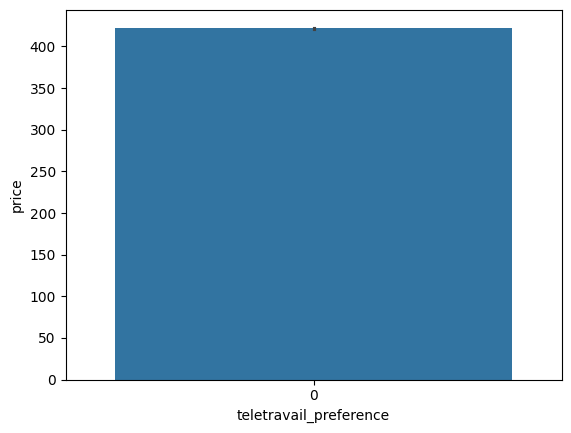

In [3]:
sns.barplot(x='teletravail_preference', y='price', data=df)

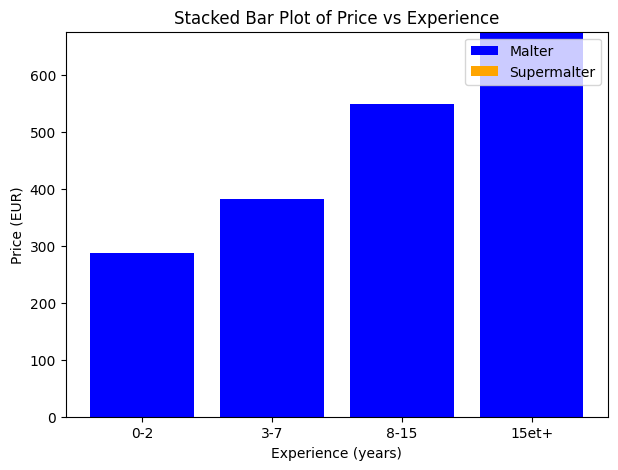

In [4]:
supermalter_data = df[df['teletravail_preference'] == 1]
non_supermalter_data = df[df['teletravail_preference'] == 0]


mean_price_supermalter = supermalter_data.groupby('experience')['price'].mean().reindex(["0-2", "3-7", "8-15", "15et+"])
mean_price_non_supermalter = non_supermalter_data.groupby('experience')['price'].mean().reindex(["0-2", "3-7", "8-15", "15et+"])


# bar_width = 0.35


fig, ax = plt.subplots(figsize=(7, 5))


ax.bar(mean_price_non_supermalter.index, mean_price_non_supermalter.values, label='Malter', color='blue')


ax.bar(mean_price_supermalter.index, (mean_price_supermalter.values - mean_price_non_supermalter.values),
       bottom=mean_price_non_supermalter.values, label='Supermalter', color='orange')


ax.set_xlabel('Experience (years)')
ax.set_ylabel('Price (EUR)')
ax.set_title('Stacked Bar Plot of Price vs Experience')
ax.legend()

plt.show()
plt.show()

compare how much missions are remote vs on site (how big is the market for remote work ?)

In [5]:
remote_data = df[df['teletravail_preference'] == 1]
non_remote_data = df[df['teletravail_preference'] == 0]
missions_data = df.groupby('teletravail_preference')['missions'].mean()

remote_mean = remote_data.mean()
non_remote_mean = non_remote_data.mean()

fig, ax = plt.subplots(figsize=(7, 5))

ax.bar(remote_data.index, missions_data.values, label='Remote', color='blue')

ax.bar(non_remote_data.index, missions_data.values, label='non_remote', color='orange')

ax.set_ylabel('Average Missions')
ax.set_title('Average Missions by Teletravail Preference')
ax.legend()

plt.show()

TypeError: can only concatenate str (not "int") to str

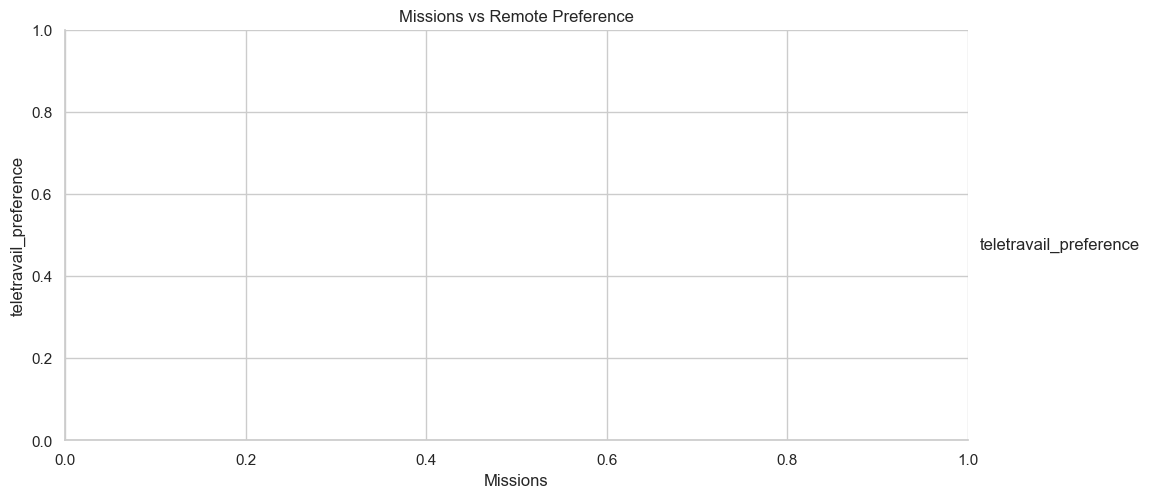

In [ ]:
sns.set_theme(style="whitegrid")

# missions_data = df[df['missions'] > 1]

g = sns.lmplot(
    data= df[df['teletravail_preference'] == 1],
    x='missions',
    y='teletravail_preference',
    hue="teletravail_preference",
    height=10,
    aspect=2,
    palette="Set1",
    x_jitter=.15,
    ci=None,
    scatter=True,
    scatter_kws={'s': 50, 'alpha': 0.6}
)

g.set_axis_labels("Missions")
plt.title("Missions vs Remote Preference")
plt.show()

compare experience level of remote workers vs non remote workers

In [ ]:
remote_workers = df[df['teletravail_preference'] == 1]
non_remote_workers = df[df['teletravail_preference'] == 0]

# Calculer les statistiques des niveaux d'expérience pour chaque groupe
remote_experience_mean = remote_workers['missions'].mean()
non_remote_experience_mean = non_remote_workers['missions'].mean()

# Créer un DataFrame pour les moyennes des niveaux d'expérience
df_means = pd.DataFrame({
    'Worker Type': ['Remote Workers', 'Non Remote Workers'],
    'Mean Missions': [remote_experience_mean, non_remote_experience_mean]
})

plt.figure(figsize=(8, 6))
sns.barplot(x='Worker Type', y='Mean Missions', data=df_means, palette='viridis')
plt.title('Comparaison des niveaux d\'expérience des travailleurs en télétravail et ceux qui ne le sont pas')
plt.ylabel('Nombre moyen de missions')
plt.show()

NameError: name 'sns' is not defined

In [ ]:
data = pd.read_csv('../../../datasets/final_parsed_malt_data_cleaned.csv')

# Compter le nombre de fois où chaque ville apparaît dans votre dataset
ville_counts = Counter(data['city'])

# Ajouter une colonne contenant le nombre d'occurrences de chaque ville dans le GeoDataFrame
gdf_communes['occurrences'] = gdf_communes['city'].map(ville_counts)

# Créer une carte de la France avec les couleurs basées sur la fréquence des villes
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
gdf_communes.plot(column='occurrences', cmap='Greys', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

# Ajouter un titre et configurer l'affichage
plt.title('Carte des villes en fonction du nombre d\'occurrences')
plt.axis('off')
plt.show()

# plt.figure(figsize=(10, 8))

# # Utiliser Seaborn pour superposer des points sur une carte vierge
# sns.scatterplot(x='longitude', y='latitude', size='frequency', hue='frequency', data=df, palette='Greys', legend=False)

# # Ajouter un titre et configurer l'affichage
# plt.title('Carte des villes en fonction du nombre d\'occurrences')
# plt.xlabel('Longitude')
# plt.ylabel('Latitude')
# plt.grid(True)  # Afficher la grille (optionnel)

# plt.show()